# Quantum Finance - Análise Descritiva e Predições


Este notebook realiza uma análise descritiva (Exploratory Data Analysis - EDA) dos dados de clientes da Quantum Finance. 
Ele inclui a limpeza de dados e uma introdução ao processo de modelagem preditiva.

### Etapas do projeto:

1. **Análise Descritiva (EDA)**: Vamos explorar as características principais dos dados.
2. **Limpeza de Dados**: Tratar valores ausentes e dados inconsistentes.
3. **Modelagem Preditiva**: Introdução à construção de um modelo de machine learning para prever resultados.
    

### Importação de Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix   

### Carregando os Dados

In [3]:
# Carregando os dados
url = 'https://raw.githubusercontent.com/lcbjrrr/QuantumF/main/credit%20-%20ok.csv'
data = pd.read_csv(url)

# Exibindo as primeiras linhas
data.head()
    

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


### Análise Descritiva (EDA)

In [4]:
# Resumo das variáveis
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83144 entries, 0 to 83143
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        83144 non-null  object 
 1   Customer_ID               83144 non-null  object 
 2   Month                     83144 non-null  object 
 3   Name                      74822 non-null  object 
 4   Age                       83144 non-null  object 
 5   SSN                       83144 non-null  object 
 6   Occupation                83144 non-null  object 
 7   Annual_Income             83144 non-null  object 
 8   Monthly_Inhand_Salary     70703 non-null  float64
 9   Num_Bank_Accounts         83144 non-null  int64  
 10  Num_Credit_Card           83144 non-null  int64  
 11  Interest_Rate             83144 non-null  int64  
 12  Num_of_Loan               83144 non-null  object 
 13  Type_of_Loan              73622 non-null  object 
 14  Delay_

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,70703.000000,83144.000000,83144.000000,83144.000000,83144.000000,81528.000000,83144.000000,83144.000000
mean,4193.869821,16.924059,22.301309,73.209191,21.050382,27.681594,32.298935,1380.861140
std,3187.081513,116.875468,128.481073,470.881900,14.841171,192.442884,5.116523,8243.094161
min,319.556250,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1629.773333,3.000000,4.000000,8.000000,10.000000,3.000000,28.063496,30.403233
50%,3081.977500,6.000000,6.000000,13.000000,18.000000,6.000000,32.333159,68.966090
75%,5947.320000,7.000000,7.000000,20.000000,28.000000,9.000000,36.517910,160.321434
max,15204.633330,1798.000000,1499.000000,5789.000000,67.000000,2597.000000,50.000000,82331.000000


### Distribuição das Variáveis

Distribuição de ID:
ID
0x25fed    1
0x1602     1
0x1603     1
0x1604     1
0x1605     1
          ..
0x1611     1
0x1612     1
0x1613     1
0x1614     1
0x1615     1
Name: count, Length: 83144, dtype: int64

Distribuição de Customer_ID:
Customer_ID
CUS_0x942c    8
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0xb891    8
             ..
CUS_0x95b5    8
CUS_0x4004    8
CUS_0x30f7    7
CUS_0x5637    7
CUS_0x39ae    2
Name: count, Length: 10394, dtype: int64

Distribuição de Month:
Month
February    10394
January     10393
March       10393
April       10393
May         10393
June        10393
July        10393
August      10392
Name: count, dtype: int64

Distribuição de Name:
Name
Langep             44
Vaughanl           39
Lucia Mutikanip    37
Nate Raymondw      37
Strupczewskid      37
                   ..
Janeman Latulf      4
Lannind             4
Horowitzg           4
Doris Frankely      4
Rudegeairu          2
Name: count, Length: 8716, dtype: int64

Distribuição de Age:
Ag

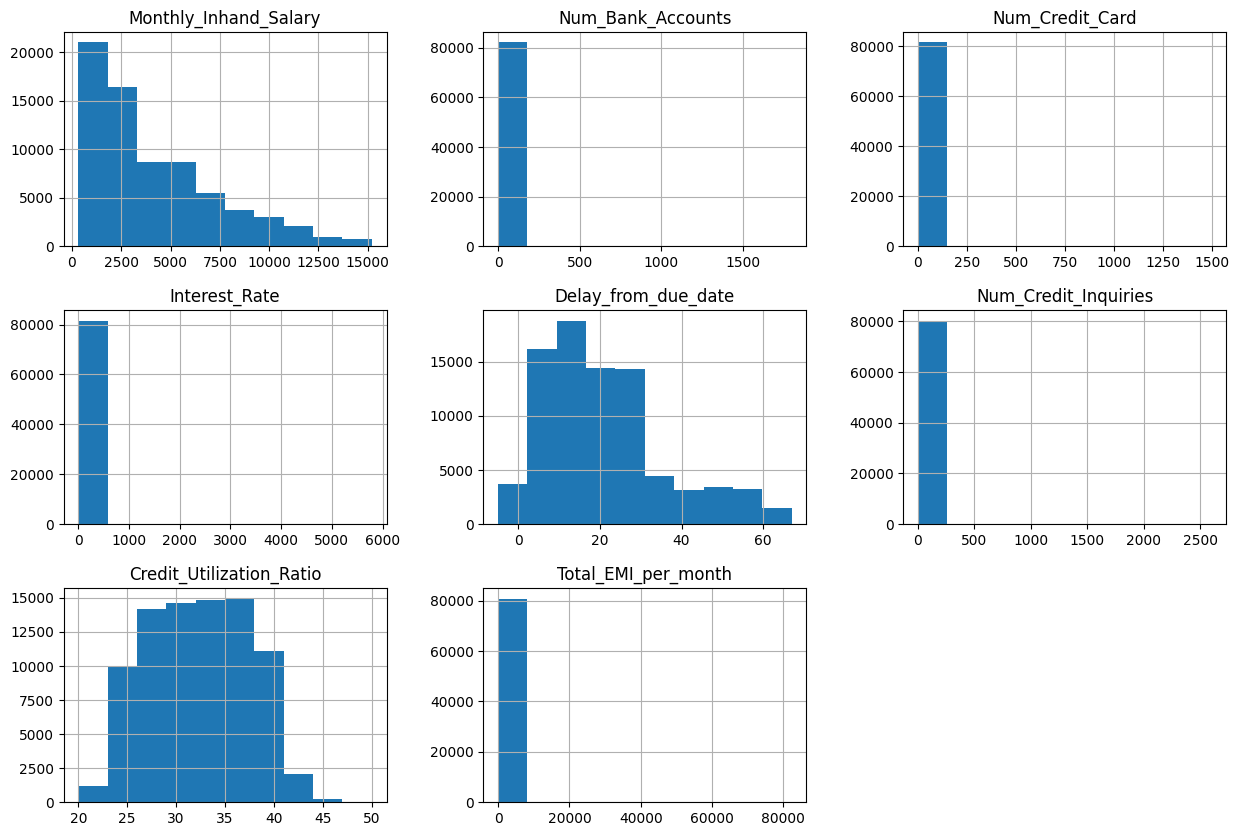

In [5]:
# Distribuição das variáveis categóricas
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Distribuição de {col}:")
    print(data[col].value_counts())
    print()

# Distribuição das variáveis numéricas
data.hist(figsize=(15, 10))
plt.show()    

### Limpeza de Dados


**Trade-offs**: 
- Devemos decidir como lidar com valores ausentes e inconsistências (por exemplo, idades negativas).
- Podemos remover linhas inteiras ou tentar imputar valores faltantes com base em médias, medianas, etc.

Neste caso, vamos optar por remover linhas com valores ausentes para simplificar a análise inicial.
    

In [6]:
# Removendo valores ausentes
data_clean = data.dropna()

# Verificando novamente se há valores ausentes
data_clean.isnull().sum()   

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### Engenharia de Features


**Trade-offs**: 
- Para variáveis categóricas, podemos usar técnicas como One-Hot Encoding ou Label Encoding. 
- Escolhemos Label Encoding por ser mais simples e rápido, mas pode não capturar relações complexas nas variáveis.

Neste exemplo, aplicamos Label Encoding nas variáveis categóricas.
    

In [12]:
# Aplicando Label Encoding usando .loc para evitar o aviso
label_enc = LabelEncoder()
for col in categorical_cols:
    data_clean.loc[:, col] = label_enc.fit_transform(data_clean[col])

# Verificando os dados após Label Encoding
data_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,8835,9064,3,59,166,7510,12,3822,1824.843333,3,...,3,8756,26.822620,180,1,49.574949,37750,3,20033,0
6,8877,9064,4,59,166,7510,12,3822,1824.843333,3,...,1,8756,22.537593,188,1,49.574949,11843,6,7652,0
8,8911,768,3,5763,237,41,15,6584,3037.986667,2,...,1,7897,24.464031,236,1,18.816215,871,6,34670,2
9,8919,768,2,5763,226,41,13,6584,3037.986667,2,...,1,7897,38.550848,237,1,18.816215,25253,1,35267,0
10,8926,768,6,5763,226,41,13,6585,3037.986667,2,...,3,7897,33.224951,238,1,18.816215,31592,1,34469,2


### Divisão dos Dados em Treino e Teste

In [13]:
# Separando os dados em variáveis independentes (X) e dependentes (y)
X = data_clean.drop('Credit_Score', axis=1)  # Substituir pela coluna alvo correta
y = data_clean['Credit_Score']  # Substituir pela coluna alvo correta

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   

### Modelagem Preditiva - RandomForest

Acurácia no treino: 1.0
Acurácia no teste: 0.7605740181268882


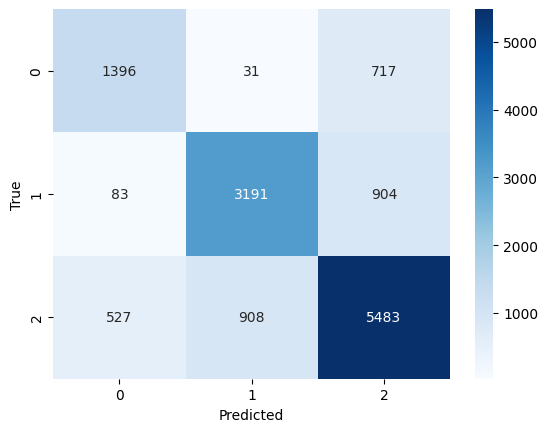

In [24]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Supondo que X seja seu dataframe com as features e y seja a variável target

# Verifique se 'y' é categórico e converta se necessário
if y.dtype == 'float' or y.dtype == 'int':  # Se y for contínuo, transformá-lo em categorias
    y = pd.cut(y, bins=3, labels=[0, 1, 2])  # Exemplo de binarização (ajuste os 'bins' conforme necessário)

# Se 'y' for categórico (texto), aplicamos Label Encoding
if y.dtype == 'object':
    label_enc = LabelEncoder()
    y = label_enc.fit_transform(y)

# Verifique a forma de y e aplique ravel() se necessário
if len(y.shape) > 1:
    y = y.ravel()

# Passo 1: Tratar valores ausentes
# Vamos usar SimpleImputer para preencher valores ausentes com a média (ou outra estratégia)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Passo 2: Codificar variáveis categóricas
# Usando Label Encoding para variáveis categóricas
label_enc = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_enc.fit_transform(X[col])

# Passo 3: Escalar as variáveis numéricas
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Passo 4: Seleção de Features (opcional)
# Para RandomForestClassifier, podemos usar a importância das features
model = RandomForestClassifier()

# Treinando o modelo com X_scaled e y (após ajustes no target)
model.fit(X_scaled, y)

# Obtendo as importâncias das features
importances = model.feature_importances_

# Filtrando features importantes (exemplo: manter as 10 features mais importantes)
important_features = X_scaled.columns[importances.argsort()[-10:]]
X_filtered = X_scaled[important_features]

# Dividindo os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, random_state=42)

# Treinando o modelo com as features selecionadas e pré-processadas
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Avaliando o modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Acurácia no treino:", accuracy_score(y_train, y_pred_train))
print("Acurácia no teste:", accuracy_score(y_test, y_pred_test))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Conclusões de Negócio


**Trade-offs**: 
- A escolha do modelo (RandomForest) é adequada para esta etapa, pois é um algoritmo robusto. No entanto, poderíamos explorar outros algoritmos como XGBoost ou SVM para comparar resultados.
- Devemos considerar otimizações no modelo, como ajustes de hiperparâmetros e técnicas de feature selection.

### Próximos Passos:
- Realizar otimizações no modelo.
- Explorar mais técnicas de feature engineering e validar com diferentes algoritmos.   

### Modelagem Preditiva - Xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\fspo1\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia no treino: 0.8365596270879192
Acurácia no teste: 0.7329305135951661

Relatório de Classificação (Treino):
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      5035
           1       0.83      0.82      0.82      9515
           2       0.85      0.86      0.85     16342

    accuracy                           0.84     30892
   macro avg       0.83      0.82      0.83     30892
weighted avg       0.84      0.84      0.84     30892


Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.67      0.64      0.65      2144
           1       0.75      0.70      0.72      4178
           2       0.74      0.78      0.76      6918

    accuracy                           0.73     13240
   macro avg       0.72      0.71      0.71     13240
weighted avg       0.73      0.73      0.73     13240



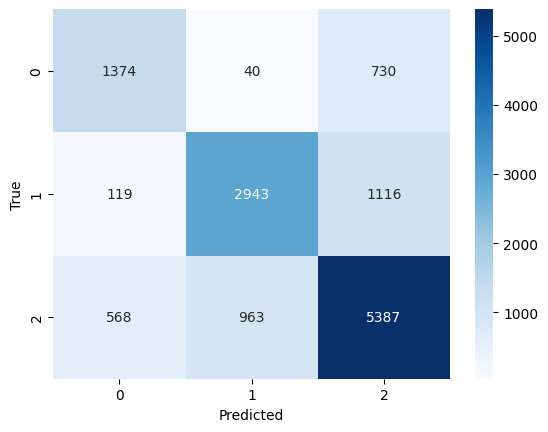

In [25]:
# Caso ainda não tenha o XGBoost instalado, utilize:
!pip install xgboost

# Importando a biblioteca
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Avaliando o modelo
print("Acurácia no treino:", accuracy_score(y_train, y_pred_train))
print("Acurácia no teste:", accuracy_score(y_test, y_pred_test))

# Relatórios de classificação
print("\nRelatório de Classificação (Treino):")
print(classification_report(y_train, y_pred_train))
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, y_pred_test))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# SVM (Support Vector Machine)

Acurácia no treino: 0.6456687815615694
Acurácia no teste: 0.6311178247734139

Relatório de Classificação (Treino):
              precision    recall  f1-score   support

           0       0.50      0.61      0.55      5035
           1       0.70      0.48      0.57      9515
           2       0.67      0.75      0.71     16342

    accuracy                           0.65     30892
   macro avg       0.63      0.61      0.61     30892
weighted avg       0.65      0.65      0.64     30892


Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.49      0.60      0.54      2144
           1       0.70      0.46      0.56      4178
           2       0.66      0.74      0.70      6918

    accuracy                           0.63     13240
   macro avg       0.61      0.60      0.60     13240
weighted avg       0.64      0.63      0.63     13240



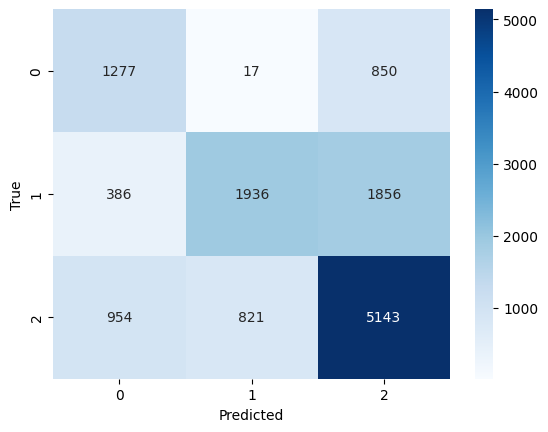

In [26]:
# Importando as bibliotecas necessárias
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Normalizando os dados com StandardScaler
scaler = StandardScaler()

# Ajustando e transformando os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Apenas transformando os dados de teste com base nos dados de treino
X_test_scaled = scaler.transform(X_test)

# Criando o modelo SVM
model = SVC()

# Treinando o modelo com os dados normalizados
model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Avaliando o modelo
print("Acurácia no treino:", accuracy_score(y_train, y_pred_train))
print("Acurácia no teste:", accuracy_score(y_test, y_pred_test))

# Relatórios de classificação
print("\nRelatório de Classificação (Treino):")
print(classification_report(y_train, y_pred_train))
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, y_pred_test))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()